In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph , START , END


In [2]:
class AgentState(TypedDict):
    num1: int
    num2: int
    num3:int
    num4: int
    operator1: str
    operator2: str
    finalNum1: int
    finalNum2: int

In [7]:
def addNode1(state: AgentState)->AgentState:
    state['finalNum1'] = state['num1'] + state['num2']
    return state

def subNode1(state: AgentState)->AgentState:
    state['finalNum1'] = state['num1'] - state['num2']
    return state
    

In [8]:
def routerFunc1(state:AgentState)->AgentState:
    if state['operator1'] == '+':
        return "addEdge1"
    elif state['operator1'] == '-':
        return "subEdge1"

In [5]:
def addNode2(state:AgentState)->AgentState:
    state['finalNum2'] = state['num3'] + state['num4']
    return state

def subNode2(state:AgentState)->AgentState:
    state['finalNum2'] = state['num3'] - state['num4']
    return state
    

In [6]:
def routerFunc2(state:AgentState)->AgentState:
    if state['operator2'] == '+':
        return "addEdge2"
    elif state['operator2'] == '-':
        return "subEdge2"
        
        

In [9]:
graph = StateGraph(AgentState)
graph.add_node("adder1", addNode1)
graph.add_node("sub1" , subNode1)
graph.add_node("adder2" , addNode2)
graph.add_node("sub2" , subNode2)

graph.add_node("router1" , lambda x:x)
graph.add_node("router2" , lambda x:x)

graph.add_edge(START , "router1")

graph.add_conditional_edges(
    "router1",
    routerFunc1,
    {
        "addEdge1": "adder1",
        "subEdge1": "sub1",
    }
)

graph.add_edge("adder1" , "router2")
graph.add_edge("sub1" , "router2")

graph.add_conditional_edges(
    "router2",
    routerFunc2,
    {
        "addEdge2": "adder2",
        "subEdge2": "sub2",
    }
)

graph.add_edge("adder2" , END)
graph.add_edge("sub2" , END)

app = graph.compile()




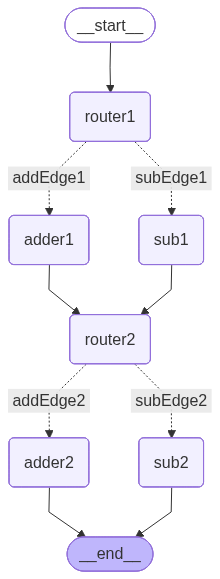

In [10]:
app

In [11]:
result = app.invoke({
    "num1":10,
    "operator1":"-",
    "num2":5,
    "num3":7,
    "num4":2,
    "operator2":"+",
    "finalNum1":0,
    "finalNum2":0
})


In [12]:
print(result['finalNum1'])
print(result['finalNum2'])

5
9
